In [1]:
#Importing all the ncessary libraries 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import seaborn as sns
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
import nltk
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
import string
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import warnings
warnings.simplefilter('ignore')

[nltk_data] Downloading package stopwords to C:\Users\Mandar
[nltk_data]     Limaye\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Mandar Limaye\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to C:\Users\Mandar
[nltk_data]     Limaye\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


(844, 23)

# Basic EDA

In [ ]:
#Reading data from file
df = pd.read_csv('kindle_reviews.csv', encoding='unicode_escape')

df.shape

In [2]:
df.head(3)

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.dateSeen,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username
0,AVphPmHuilAPnD_x3E5h,2016-03-31T21:08:24Z,2019-03-12T04:21:17Z,"Kindle Voyage E-reader, 6 High-Resolution Disp...",B00IOY8XWQ,Amazon,"eBook Readers,Electronics Features,Walmart for...",Electronics,https://images-na.ssl-images-amazon.com/images...,"amazon/b00ioy8xwq,848719040104,kindlevoyageere...",...,"2017-07-07T00:00:00Z,2018-05-28T00:00:00Z,2017...",NaN,True,NaN,0,5,https://reviews.bestbuy.com/3545/9302088/revie...,I bought this so i can save all of my books. I...,"A bit small, but very useful!!",Goldfish
1,AVphPmHuilAPnD_x3E5h,2016-03-31T21:08:24Z,2019-03-12T04:21:17Z,"Kindle Voyage E-reader, 6 High-Resolution Disp...",B00IOY8XWQ,Amazon,"eBook Readers,Electronics Features,Walmart for...",Electronics,https://images-na.ssl-images-amazon.com/images...,"amazon/b00ioy8xwq,848719040104,kindlevoyageere...",...,"2017-07-07T00:00:00Z,2018-05-28T00:00:00Z,2017...",NaN,True,NaN,0,5,http://reviews.bestbuy.com/3545/9302088/review...,I bought this as a gift. I think it is pretty ...,a decent gift,Zigpig
2,AVphPmHuilAPnD_x3E5h,2016-03-31T21:08:24Z,2019-03-12T04:21:17Z,"Kindle Voyage E-reader, 6 High-Resolution Disp...",B00IOY8XWQ,Amazon,"eBook Readers,Electronics Features,Walmart for...",Electronics,https://images-na.ssl-images-amazon.com/images...,"amazon/b00ioy8xwq,848719040104,kindlevoyageere...",...,"2017-07-07T00:00:00Z,2018-05-28T00:00:00Z,2017...",NaN,True,NaN,0,5,http://reviews.bestbuy.com/3545/9302088/review...,"This is a great e-reader, perhaps a little pri...",A great e-reader,david


In [3]:
#Selecting values with only Kindle product

df = df[df['name'].str.lower().str.contains('kindle')]
df = df.reset_index()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 745 entries, 0 to 744
Data columns (total 24 columns):
index                  745 non-null int64
id                     745 non-null object
dateAdded              745 non-null object
dateUpdated            745 non-null object
name                   745 non-null object
asins                  745 non-null object
brand                  745 non-null object
categories             745 non-null object
primaryCategories      745 non-null object
imageURLs              745 non-null object
keys                   745 non-null object
manufacturer           745 non-null object
manufacturerNumber     745 non-null object
reviews.date           745 non-null object
reviews.dateSeen       745 non-null object
reviews.didPurchase    0 non-null float64
reviews.doRecommend    745 non-null bool
reviews.id             0 non-null float64
reviews.numHelpful     745 non-null int64
reviews.rating         745 non-null int64
reviews.sourceURLs     745 non-null object

# Summary Statastics

Summary statastics & histogram for variable reviews.doRecommend

       reviews.doRecommend
count                  745
unique                   2
top                   True
freq                   723
-----------------------------------------------------------------------
True     723
False     22
Name: reviews.doRecommend, dtype: int64


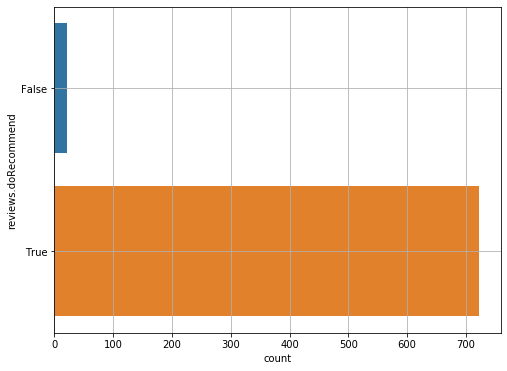

In [4]:
#Summary Statastics & histogram for variable 'reviews.doRecommend'

print('Summary statastics & histogram for variable reviews.doRecommend')
print()
print(df[['reviews.doRecommend']].describe())
print("-----------------------------------------------------------------------")
print(df['reviews.doRecommend'].value_counts())

#df['reviews.doRecommend'].value_counts().plot.bar()
plt.subplots(figsize=(8,6))
sns.countplot(y='reviews.doRecommend', data=df[['reviews.doRecommend']])
plt.grid()
plt.show()

Summary statastics & histogram for variable reviews.ratings

count    745.000000
mean       4.703356
std        0.630158
min        1.000000
25%        5.000000
50%        5.000000
75%        5.000000
max        5.000000
Name: reviews.rating, dtype: float64
-----------------------------------------------------------------------


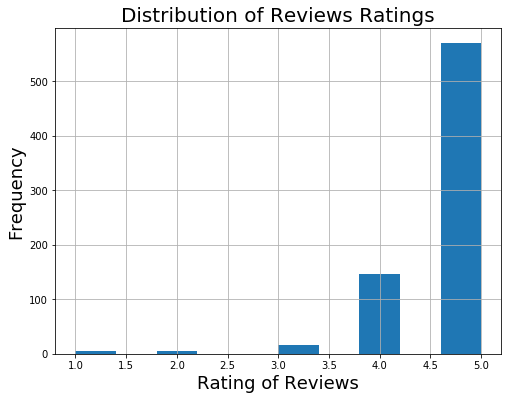

In [5]:
#Summary Statastics & histogram for variable 'reviews.ratings'

print('Summary statastics & histogram for variable reviews.ratings')
print()
print(df['reviews.rating'].describe())
print("-----------------------------------------------------------------------")

plt.subplots(figsize=(8,6))
plt.hist(df['reviews.rating'])
plt.xlabel("Rating of Reviews",fontsize=18)
plt.ylabel("Frequency",fontsize=18)
plt.title("Distribution of Reviews Ratings", fontsize=20)
plt.grid()
plt.show()

Summary statastics & histogram for variable reviews.numHelpful

count    745.000000
mean       1.868456
std        4.934124
min        0.000000
25%        0.000000
50%        0.000000
75%        2.000000
max       72.000000
Name: reviews.numHelpful, dtype: float64
-----------------------------------------------------------------------


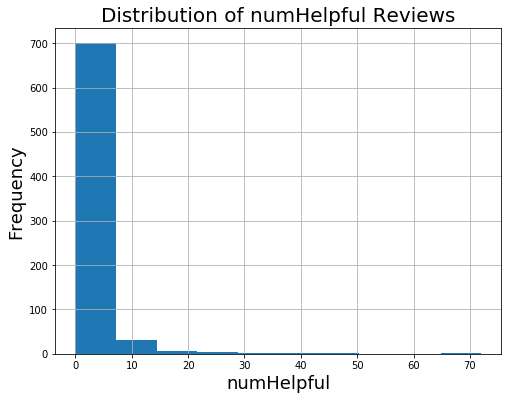

In [6]:
#Summary Statastics & histogram for variable 'reviews.numHelpful'

print('Summary statastics & histogram for variable reviews.numHelpful')
print()
print(df['reviews.numHelpful'].describe())
print("-----------------------------------------------------------------------")

plt.subplots(figsize=(8,6))
plt.hist(df['reviews.numHelpful'])
plt.xlabel("numHelpful",fontsize=18)
plt.ylabel("Frequency",fontsize=18)
plt.title("Distribution of numHelpful Reviews", fontsize=20)
plt.grid()
plt.show()

One of the major issues with using these fields as target variable is the skewness of the values of columns

Although the variables are discreate they have different range for each. In order to built a better model it might have been helpful to have a feature variables with consistent range. 
The data is majorly biased towards reviews that do recommend the purchase of the kindle.

The data is also skewd in a way that majority of users who have given the review have given a 4 or above ratings to the product. This distribution does not give a holistic idea about the product reviews.

The models built using these feature variables might even show a high accuracy but it might be biased due to inadequte training data


# Text Pre-Processing & Initial Analysis

In [7]:
#Preping the text of reviews 

stop_words = stopwords.words('english')

#Removing all the punction marks from sentences
df['reviews_wo'] = df['reviews.text'].str.replace('[^\w\s]','').str.replace('[\d+]','').str.replace('<.*?>','')

#Removing all the stop words
df['clean_review'] = df['reviews_wo'].str.lower().str.split().apply(lambda x: [item for item in x if item not in stop_words])

#Creating tokenziner, lemmitizer, stemmer to process the review text
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = WordNetLemmatizer()
porter_stemmer = PorterStemmer()

#Functions for lemmitizer, stemmer
def lemmatize_text(text_list):
    return [lemmatizer.lemmatize(w) for w in text_list]

def stemming_text(text_list):
    return [porter_stemmer.stem(w) for w in text_list]

df['clean_review'] = df.clean_review.apply(lemmatize_text)
df['clean_review'] = df.clean_review.apply(stemming_text)

#Creating a string of tokeznined words to be used later 
df['string_clean_review'] = df['clean_review'].apply(' '.join)

df.head(5)

,index,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,...,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,reviews_wo,clean_review,string_clean_review
0,0,AVphPmHuilAPnD_x3E5h,2016-03-31T21:08:24Z,2019-03-12T04:21:17Z,"Kindle Voyage E-reader, 6 High-Resolution Disp...",B00IOY8XWQ,Amazon,"eBook Readers,Electronics Features,Walmart for...",Electronics,https://images-na.ssl-images-amazon.com/images...,...,NaN,0,5,https://reviews.bestbuy.com/3545/9302088/revie...,I bought this so i can save all of my books. I...,"A bit small, but very useful!!",Goldfish,I bought this so i can save all of my books It...,"[bought, save, book, bit, small, first, get, u...",bought save book bit small first get use overa...
1,1,AVphPmHuilAPnD_x3E5h,2016-03-31T21:08:24Z,2019-03-12T04:21:17Z,"Kindle Voyage E-reader, 6 High-Resolution Disp...",B00IOY8XWQ,Amazon,"eBook Readers,Electronics Features,Walmart for...",Electronics,https://images-na.ssl-images-amazon.com/images...,...,NaN,0,5,http://reviews.bestbuy.com/3545/9302088/review...,I bought this as a gift. I think it is pretty ...,a decent gift,Zigpig,I bought this as a gift I think it is pretty d...,"[bought, gift, think, pretti, decent, qualiti,...",bought gift think pretti decent qualiti design
2,2,AVphPmHuilAPnD_x3E5h,2016-03-31T21:08:24Z,2019-03-12T04:21:17Z,"Kindle Voyage E-reader, 6 High-Resolution Disp...",B00IOY8XWQ,Amazon,"eBook Readers,Electronics Features,Walmart for...",Electronics,https://images-na.ssl-images-amazon.com/images...,...,NaN,0,5,http://reviews.bestbuy.com/3545/9302088/review...,"This is a great e-reader, perhaps a little pri...",A great e-reader,david,This is a great ereader perhaps a little price...,"[great, eread, perhap, littl, pricey, well, wo...",great eread perhap littl pricey well worth mon...
3,3,AVphPmHuilAPnD_x3E5h,2016-03-31T21:08:24Z,2019-03-12T04:21:17Z,"Kindle Voyage E-reader, 6 High-Resolution Disp...",B00IOY8XWQ,Amazon,"eBook Readers,Electronics Features,Walmart for...",Electronics,https://images-na.ssl-images-amazon.com/images...,...,NaN,0,5,http://reviews.bestbuy.com/3545/9302088/review...,"I have owned several Kindles over the years, a...",A great Kindle,Jimbo,I have owned several Kindles over the years an...,"[own, sever, kindl, year, one, best, yet, cont...",own sever kindl year one best yet contrast cla...
4,4,AVphPmHuilAPnD_x3E5h,2016-03-31T21:08:24Z,2019-03-12T04:21:17Z,"Kindle Voyage E-reader, 6 High-Resolution Disp...",B00IOY8XWQ,Amazon,"eBook Readers,Electronics Features,Walmart for...",Electronics,https://images-na.ssl-images-amazon.com/images...,...,NaN,3,5,http://reviews.bestbuy.com/3545/9302088/review...,Nothing will replace the joy of flipping throu...,A great space saver for book lovers,SillyGoober,Nothing will replace the joy of flipping throu...,"[noth, replac, joy, flip, page, book, live, st...",noth replac joy flip page book live studio apa...


In [8]:
#Identifying top 10 most frequent words 

most_frequent = Counter(" ".join(df['string_clean_review']).split()).most_common(10)
freq_df = pd.DataFrame(most_frequent, columns=['Words', 'Count'])
freq_df = freq_df.set_index('Words')
print("Top 10 Frequent Words: ")
freq_df

Top 10 Frequent Words: 


,Count
Words,
kindl,612
read,435
light,292
voyag,243
love,241
use,226
screen,214
great,211
page,201


In [9]:
#Identifying top 10 nouns & adjectives 
list_nouns = []
list_adjective = []

#Running a loop over the column and the list in each row to identify the noun and adjective
for i in range(len(df)):
    temp_tags = nltk.pos_tag(df['clean_review'][i])
    for j in range(len(temp_tags)):
        if('NN' in temp_tags[j][1]):
            list_nouns.append(temp_tags[j][0])
        elif('JJ' in temp_tags[j][1]):
            list_adjective.append(temp_tags[j][0])            

In [10]:
#List of top 10 nouns
top_noun = Counter(list_nouns).most_common(10)
freq_noun_df = pd.DataFrame(top_noun, columns=['Nouns', 'Count'])
freq_noun_df = freq_noun_df.set_index('Nouns')
print("Top 10 Nouns are as follows: ")
freq_noun_df

Top 10 Nouns are as follows: 


,Count
Nouns,
kindl,446
page,196
book,180
use,177
voyag,170
reader,150
screen,136
easi,126
paperwhit,116


In [11]:
#List of top 10 Adjectives
top_adjective = Counter(list_adjective).most_common(10)
freq_adj_df = pd.DataFrame(top_adjective, columns=['Adjective', 'Count'])
freq_adj_df = freq_adj_df.set_index('Adjective')
print("Top 10 Adjectives are as follows: ")
freq_adj_df

Top 10 Adjectives are as follows: 


,Count
Adjective,
great,211
light,170
best,128
read,117
new,106
much,76
screen,71
good,70
upgrad,69


In [12]:
#List of top 10 frequent words in the reviews that do not recommend purchase of the Kindle

df_temp = df[df['reviews.doRecommend'] == False]

most_frequent1 = Counter(" ".join(df_temp['string_clean_review']).split()).most_common(10)

freq_df1 = pd.DataFrame(most_frequent1, columns=['Words', 'Count'])
freq_df1 = freq_df1.set_index('Words')
print("Top 10 frequent words in the reviews that do not recommend purchase of the Kindle: ")
freq_df1

Top 10 frequent words in the reviews that do not recommend purchase of the Kindle: 


,Count
Words,
kindl,14
turn,13
amazon,11
voyag,10
light,10
would,9
buy,8
devic,8
page,7


# Modeling: Sentiment Analisys

In [13]:
#Model to predict wheather a customer will give a 5-star rating based on the text of review

#Taking the ncessary data into a new dataframe
df_data = df[['id', 'reviews.doRecommend','reviews.rating','reviews.text','clean_review','string_clean_review']]

#Assinging the sentiment of 1 to 5 star rating and 0 to all ther rating
sentiment = {1:0, 2:0, 3:0, 4:0, 5: 1}
df_data['sentiment'] = df_data['reviews.rating'].map(sentiment)

#Building tfidf matrix to train models 
vector =TfidfVectorizer(max_df=0.9)
text_reviews = vector.fit_transform(df_data['string_clean_review'])

#Identifying the split of train and test data
X_train, X_test, y_train, y_test = train_test_split(text_reviews, df_data['sentiment'], test_size=0.3, random_state=1, shuffle = True)

# Create the classifier:
rfc_reg = RandomForestClassifier()  

# Fit the classifier to the training data
rfc_reg.fit(X_train, y_train)

# Predict on the test data: y_pred
y_pred = rfc_reg.predict(X_test)

#Building the confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred, labels=[0,1]).ravel()

output = { 'TPR' : np.round([(tp/(tp + fn))],4),
           'FPR' : np.round([(fp / (tn + fp))],4),
           'Accuracy' : np.round([((tp + tn) / (tn + fp + fn + tp))],4),
           'Precision' : np.round([(tp / (tp + fp))],4),
           'Recall' : np.round([(tp/(tp + fn))],4)
          }
df_ans = pd.DataFrame(output)

print("Analysis of the performance of the Random Classifier Model")
df_ans

Analysis of the performance of the Random Classifier Model


,TPR,FPR,Accuracy,Precision,Recall
0,0.9709,0.7115,0.8125,0.8186,0.9709


More robust model that will predict when at least two customer will find a review helpful.

In [14]:
#Refernce: https://docs.microsoft.com/en-us/nimbusml/tutorials/b_a-sentiment-analysis-1-data-loading-with-pandas

#Model to predict wheather at least two customers will find a review helpful
df_data = df[['reviews.numHelpful', 'reviews.doRecommend','reviews.rating','reviews.text','string_clean_review']]

#Converting the numHelpful Values into sentiments
df_data['sentiment_numHelpful'] = np.where(df_data['reviews.numHelpful'] >= 2, 1, 0)

#Converting thedoRecommend column into binary values
df_data['reviews.doRecommend'] = np.where(df_data['reviews.doRecommend'] == True, 1, 0)

#Building tfidf matrix to train models 
vector = TfidfVectorizer(max_df=0.9)
text_reviews = vector.fit_transform(df_data['string_clean_review'])

#Buidling the dataframe of all the feature variables
df_feature = pd.DataFrame(text_reviews.toarray())
df_feature['reviews.doRecommend'] = df_data['reviews.doRecommend']
df_feature['reviews.rating'] = df_data['reviews.rating']

#Identifying the split of train and test data
X_train, X_test, y_train, y_test = train_test_split(df_feature, df_data['sentiment_numHelpful'], test_size=0.3, random_state=1, shuffle = True)

# Create the classifier:
rfc_reg = RandomForestClassifier()  

# Fit the classifier to the training data
rfc_reg.fit(X_train, y_train)

# Predict on the test data: y_pred
y_pred = rfc_reg.predict(X_test)

#Building the confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred, labels=[0,1]).ravel()

output = { 'TPR' : np.round([(tp/(tp + fn))],4),
           'FPR' : np.round([(fp / (tn + fp))],4),
           'Accuracy' : np.round([((tp + tn) / (tn + fp + fn + tp))],4),
           'Precision' : np.round([(tp / (tp + fp))],4),
           'Recall' : np.round([(tp/(tp + fn))],4)
          }

print("Analysis of the performance of the Random Classifier Model")
df_ans = pd.DataFrame(output)

df_ans

Analysis of the performance of the Random Classifier Model


,TPR,FPR,Accuracy,Precision,Recall
0,0.2623,0.0123,0.7902,0.8889,0.2623
